In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

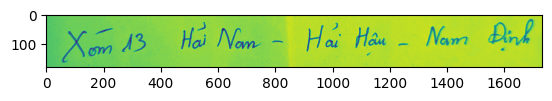

In [5]:
plt.imshow(gray)

In [50]:
img = cv2.imread(r'./address.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 250, 260, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

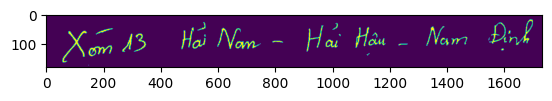

In [51]:
plt.imshow(thresh)

In [39]:
def transform_image(image):
    image = (255 - image) * (-10/255)
    return np.around(image)

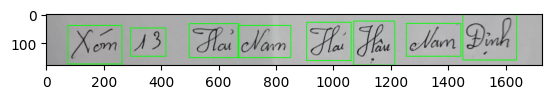

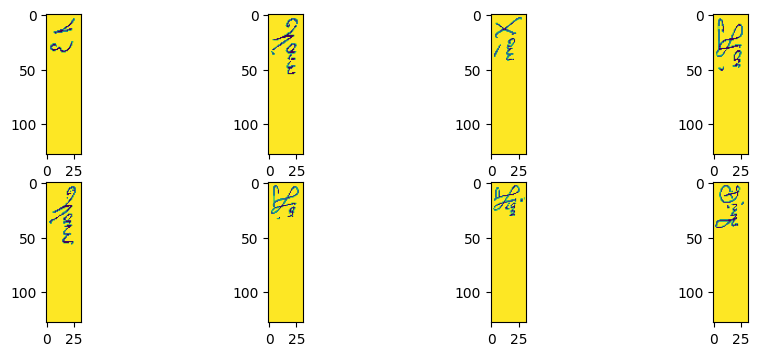

In [193]:
img = cv2.imread(r'./address.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 150, 160, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6,6))
dilated = cv2.dilate(thresh, kernel, iterations=6)

contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

threshold_area = 10
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > threshold_area]

boxes = [cv2.boundingRect(cnt) for cnt in contours]
#tạo các bounding box cho chữ cái trên hình
for box in boxes:
    x, y, w, h = box
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(img)


#Crop các hình và lưu vào list crop_img
img = cv2.imread(r'./address.png',cv2.IMREAD_GRAYSCALE)
crop_img=[]
for box in boxes:
    x, y, w, h = box
    crop_img.append(img[y:y+h, x:x+w])
    
#resize các hình trong list crop_img về (128,32) và lưu vào list word_img để sẵn sàng dự đoán  
word_img = []    
plt.figure(figsize=(11,4))
for i,img in enumerate(crop_img):
    plt.subplot(math.ceil(len(crop_img)/4),4,i+1)
    
    '''
    Tạo ra một mask có kích thước là bội số của (128,32), sau đó chèn ảnh crop_img vào mask, cuối cùng resize lại ảnh mask về
    (128,32), ta được ảnh sẵn sàng cho vào model train
    '''
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    h_mask = int(img.shape[0]/32)
    mask = np.full((img.shape[0],128*h_mask),255,dtype=np.uint8)
    mask[0:img.shape[0],0:img.shape[1]] = img
    new_img = np.array(mask)
    new_img = cv2.resize(new_img,(128,32))
    

    
    
    new_img = cv2.resize(new_img, (128, 32), cv2.INTER_CUBIC)
    
    new_img = cv2.bitwise_not(new_img)
#     kernel = np.ones((1,2), np.uint8)
#     new_img = cv2.dilate(new_img, kernel, iterations=1)
    new_img = cv2.bitwise_not(new_img)

    new_img = cv2.threshold(new_img, 255, 0, cv2.THRESH_TOZERO_INV)[1]
    new_img = cv2.transpose(new_img) 
    new_img = transform_image(new_img)

#     new_img = cv2.cvtColor(new_img,cv2.COLOR_GRAY2BGR)
    
    word_img.append(new_img)
    plt.imshow(new_img)


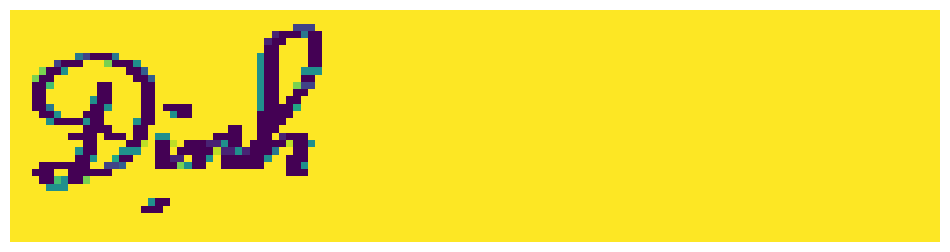

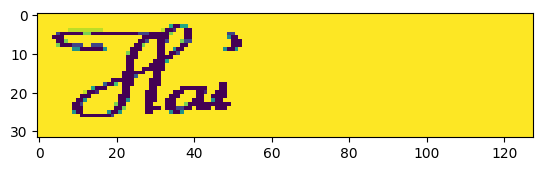

In [192]:
plt.figure(num = 'char',figsize  = (12,7))
for i in range(len(word_img)):
#     plt.subplot(3,2,i+1)
    plt.imshow(np.rot90(np.fliplr(np.squeeze(word_img[i]))))
    plt.axis('off')
plt.show()
plt.imshow(np.rot90(np.fliplr(np.squeeze(word_img[3]))))

In [187]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def preprocess_large_image(img):
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(img, 150, 160, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 17))
    dilated = cv2.dilate(thresh, kernel, iterations=2)

    contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    threshold_area = 1000
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > threshold_area]

    boxes = [cv2.boundingRect(cnt) for cnt in contours]
    # tạo các bounding box cho chữ cái trên hình
    for box in boxes:
        x, y, w, h = box
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # plt.imshow(img)

    # Crop các hình và lưu vào list crop_img
    # img = cv2.imread(r'./paper test.png', cv2.IMREAD_GRAYSCALE)
    crop_img = []
    for box in boxes:
        x, y, w, h = box
        crop_img.append(img[y:y + h, x:x + w])

    # resize các hình trong list crop_img về (128,32) và lưu vào list word_img để sẵn sàng dự đoán
    word_img = []
    for img in crop_img:
        '''
        Tạo ra một mask có kích thước là bội số của (128,32), sau đó chèn ảnh crop_img vào mask, cuối cùng resize lại ảnh mask về
        (128,32), ta được ảnh sẵn sàng cho vào model train
        '''
        h_mask = int(img.shape[0] / 32)
        mask = np.full((img.shape[0], 128 * h_mask), 255, dtype=np.uint8)
        mask[0:img.shape[0], 0:img.shape[1]] = img
        new_img = np.array(mask)
        new_img = cv2.resize(new_img, (128, 32))
        new_img = cv2.cvtColor(new_img, cv2.COLOR_GRAY2BGR)
        word_img.append(new_img)
        # plt.imshow(new_img)
    return word_img

In [188]:
from PIL import Image
import cv2
import numpy as np
img = Image.open(r'C:\AI\Handwriten\paper test.png').convert('L')
img = np.array(img)
word_image = preprocess_large_image(img)
word_image[0].shape

(32, 128, 3)

In [71]:
print(boxes)

[(236, 337, 262, 130), (712, 258, 198, 106), (941, 236, 223, 127), (104, 61, 204, 120), (378, 31, 241, 216)]
